In [1]:
from sklearn.decomposition import PCA # PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_Benign = "Updated data/BENIGN.csv"
Benign_data = pd.read_csv(file_path_Benign)
total_data = pd.read_csv(file_path_Benign)
"""
file_path_Benign2 = "Updated data/BENIGN_2.csv"
Benign2_data = pd.read_csv(file_path_Benign2)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign2)]) 

file_path_Benign3 = "Updated data/Benign_3.csv"
Benign3_data = pd.read_csv(file_path_Benign3)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign3)])

file_path_Benign4 = "Updated data/Benign_4.csv"
Benign4_data = pd.read_csv(file_path_Benign4)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign4)])
"""
file_path_Botnet = "Updated data/BotnetARES.csv"
Botnet_data = pd.read_csv(file_path_Botnet)
total_data = pd.concat([total_data, pd.read_csv(file_path_Botnet)])

file_path_Brute = "Updated data/BruteForce.csv"
Brute_data = pd.read_csv(file_path_Brute)
total_data = pd.concat([total_data, pd.read_csv(file_path_Brute)])

file_path_Dos = "Updated data/Dos.csv"
Dos_data = pd.read_csv(file_path_Dos)
total_data = pd.concat([total_data, pd.read_csv(file_path_Dos)])

file_path_Infiltration = "Updated data/Infiltration.csv"
Infil_data = pd.read_csv(file_path_Infiltration)
total_data = pd.concat([total_data, pd.read_csv(file_path_Infiltration)])

file_path_Web = "Updated data/WebAttack.csv"
Web_data = pd.read_csv(file_path_Web)
total_data = pd.concat([total_data, pd.read_csv(file_path_Web)])

file_path_Port = "Updated data/PortScan.csv"
Port_data = pd.read_csv(file_path_Port)
total_data = pd.concat([total_data, pd.read_csv(file_path_Port)])

total_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53.0,88801.0,1.0,1.0,85.0,101.0,85.0,85.0,85.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,443.0,530888.0,1.0,1.0,6.0,31.0,6.0,6.0,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,53.0,110067.0,1.0,1.0,47.0,164.0,47.0,47.0,47.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,55414.0,37.0,3.0,1.0,43.0,6.0,31.0,6.0,14.333333,14.433757,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,53.0,30598.0,1.0,1.0,49.0,133.0,49.0,49.0,49.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [3]:
print("total_data", total_data.shape)
print("Benign_data", Benign_data.shape)
#print("Benign2_data", Benign2_data.shape)
#print("Benign3_data", Benign3_data.shape)
#print("Benign4_data", Benign3_data.shape)
print("Botnet_data", Botnet_data.shape)
print("Brute_data", Brute_data.shape)
print("Dos_data", Dos_data.shape)
print("Infil_data", Infil_data.shape)
print("Web_data", Web_data.shape)
print("Port_data", Port_data.shape)

total_data (70000, 79)
Benign_data (10000, 79)
Botnet_data (10000, 79)
Brute_data (10000, 79)
Dos_data (10000, 79)
Infil_data (10000, 79)
Web_data (10000, 79)
Port_data (10000, 79)


In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 9999
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             70000 non-null  float64
 1   Flow Duration                70000 non-null  float64
 2   Total Fwd Packets            70000 non-null  float64
 3   Total Backward Packets       70000 non-null  float64
 4   Total Length of Fwd Packets  70000 non-null  float64
 5   Total Length of Bwd Packets  70000 non-null  float64
 6   Fwd Packet Length Max        70000 non-null  float64
 7   Fwd Packet Length Min        70000 non-null  float64
 8   Fwd Packet Length Mean       70000 non-null  float64
 9   Fwd Packet Length Std        70000 non-null  float64
 10  Bwd Packet Length Max        70000 non-null  float64
 11  Bwd Packet Length Min        70000 non-null  float64
 12  Bwd Packet Length Mean       70000 non-null  float64
 13  Bwd Packet Length

In [5]:
total_data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,70000.00000,7.000000e+04,70000.000000,70000.000000,7.000000e+04,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04
mean,5174.72767,2.040893e+07,261.912946,261.408138,6.559883e+04,3.225796e+03,409.377027,122.234208,195.841833,204.055844,...,141.399781,27.068280,5.171439e+05,2.882568e+05,7.332333e+05,2.988209e+05,1.011924e+07,2.314309e+06,1.201867e+07,8.493880e+06
std,13175.62085,3.760250e+07,2539.164728,2539.170875,3.374115e+05,4.436287e+04,2655.071866,2449.535496,2461.486613,2460.055342,...,693.365308,6.589142,2.841523e+06,1.761496e+06,3.980262e+06,1.861955e+06,2.467277e+07,7.602719e+06,2.715320e+07,2.358495e+07
min,0.00000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.400000e+01,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.010465e+05,3.000000,2.000000,1.400000e+01,1.800000e+01,14.000000,0.000000,7.000000,0.000000,...,0.000000,28.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2607.00000,9.853179e+06,9.944157,15.000000,3.570000e+02,1.880000e+02,326.000000,6.000000,80.000000,121.666667,...,4.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65515.00000,1.200000e+08,65276.000000,65276.000000,2.866110e+06,7.878088e+06,65276.000000,65276.000000,65276.000000,65276.000000,...,5522.000000,56.000000,7.140000e+07,2.610000e+07,7.140000e+07,7.140000e+07,1.196381e+08,6.650000e+07,1.196381e+08,1.196381e+08


# PCA

## Total Data

In [6]:
# Drop "Label" column from the complete data
(total_data.iloc[:,:-1]).head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,53.0,88801.0,1.0,1.0,85.0,101.0,85.0,85.0,85.000000,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,443.0,530888.0,1.0,1.0,6.0,31.0,6.0,6.0,6.000000,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53.0,110067.0,1.0,1.0,47.0,164.0,47.0,47.0,47.000000,0.000000,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55414.0,37.0,3.0,1.0,43.0,6.0,31.0,6.0,14.333333,14.433757,...,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.0,30598.0,1.0,1.0,49.0,133.0,49.0,49.0,49.000000,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Keep 99% information of the data
pca = PCA(n_components = 0.99)
data_pca = pca.fit_transform(total_data.iloc[:,:-1])
data_pca.shape

(70000, 7)

In [10]:
principalDf = pd.DataFrame(data = data_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7'])
principalDf = principalDf.reset_index(drop = True)
total_data = total_data.reset_index(drop = True)
principalDf = pd.concat([principalDf, total_data.iloc[:,-1]], axis = 1)
principalDf.head()

,c1,c2,c3,c4,c5,c6,c7,Label
0,-4.318837e+07,3.028733e+06,1.378006e+06,-583781.065233,-793011.069974,-712434.887067,236926.179766,BENIGN
1,-4.284831e+07,3.040031e+06,1.244350e+06,-585242.628817,-780786.958780,-556199.240217,-138367.699325,BENIGN
2,-4.317199e+07,3.029344e+06,1.371528e+06,-583929.307088,-792418.347294,-704997.246340,219063.594434,BENIGN
3,-4.326078e+07,3.028181e+06,1.413177e+06,738653.611443,-790008.698333,-740460.575192,311144.797659,BENIGN
4,-4.323314e+07,3.027285e+06,1.395601e+06,-580000.613469,-794602.662637,-733034.365485,286428.822935,BENIGN


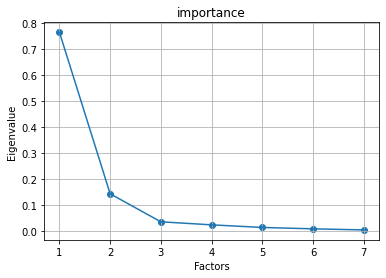

Numbers of components: 7
PCA components shape: (7, 78)


In [11]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1, len(importance)+1),importance)
plt.plot(range(1, len(importance)+1),importance)
plt.title('importance')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

print("Numbers of components: {}".format(pca.n_components_))
print("PCA components shape:", (pca.components_).shape)

In [12]:
explained_variance_need = np.array([pca.explained_variance_])
component_need = np.array(pca.components_)
print("explained_variance_need shape: ", explained_variance_need.shape)
print("component_need shape: ", component_need.shape)
column_names = list(total_data)
weights = np.divide(np.dot(explained_variance_need, component_need), np.sum(component_need, axis = 0), out = np.zeros_like(np.dot(explained_variance_need, component_need)), where=np.sum(component_need, axis = 0)!=0)
weights = weights/np.sum(weights)
df_weights = pd.DataFrame({"columns": column_names[:-1], "weights": weights[0].tolist()})
df_weights.sort_values(by="weights", ascending=False)

explained_variance_need shape:  (1, 7)
component_need shape:  (7, 78)


,columns,weights
27,Bwd IAT Std,0.812887
25,Bwd IAT Total,0.071200
22,Fwd IAT Std,0.059876
74,Idle Mean,0.022164
40,Packet Length Mean,0.021183
...,...,...
0,Destination Port,-0.012179
10,Bwd Packet Length Max,-0.015307
17,Flow IAT Std,-0.035175
48,URG Flag Count,-0.066873


## Benign

In [13]:
pca_benign = PCA(n_components = 4)
benign_pca = pca_benign.fit_transform(Benign_data.iloc[:,:-1])
print("benign_pca shape: ", benign_pca.shape)

benign_pca shape:  (10000, 4)


In [14]:
Benign_pcaDf = pd.DataFrame(data = benign_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Benign_pcaDf = Benign_pcaDf.reset_index(drop = True)
Benign_data = Benign_data.reset_index(drop = True)
Benign_pcaDf = pd.concat([Benign_pcaDf, Benign_data.iloc[:,-1]], axis = 1)
Benign_pcaDf.to_csv("Benign.csv", index=False)
Benign_pcaDf.head()

,c1,c2,c3,c4,Label
0,-2.109376e+07,-2.225877e+06,530287.048064,143706.409754,BENIGN
1,-2.077245e+07,-2.222953e+06,561869.682946,238540.606820,BENIGN
2,-2.107829e+07,-2.225814e+06,531815.487794,148206.894515,BENIGN
3,-2.118103e+07,-9.044650e+05,519904.724169,124321.298345,BENIGN
4,-2.113612e+07,-2.222674e+06,526122.607046,131188.785777,BENIGN


In [15]:
explained_variance_benign = np.array([pca_benign.explained_variance_])
component_benign = np.array(pca_benign.components_)
print("explained_variance shape: ", explained_variance_benign.shape)
print("component shape: ", component_benign.shape)
a, b = np.dot(explained_variance_benign, component_benign), np.sum(component_benign, axis = 0)
benign_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign_weights = benign_weights/np.sum(benign_weights)
df_weights_benign = pd.DataFrame({"columns": column_names[:-1], "weights": benign_weights[0].tolist()})
df_weights_benign.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
51,Down/Up Ratio,0.416255
25,Bwd IAT Total,0.127883
37,Bwd Packets/s,0.121857
20,Fwd IAT Total,0.115233
43,FIN Flag Count,0.085938
...,...,...
66,Init_Win_bytes_forward,-0.030882
40,Packet Length Mean,-0.031465
72,Active Max,-0.038588
52,Average Packet Size,-0.042451


## Botnet

In [16]:
pca_Botnet = PCA(n_components = 4)
Botnet_pca = pca_Botnet.fit_transform(Botnet_data.iloc[:,:-1])
print("Botnet_pca shape: ", Botnet_pca.shape)

Botnet_pca shape:  (10000, 4)


In [17]:
Botnet_pcaDf = pd.DataFrame(data = Botnet_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Botnet_pcaDf = Botnet_pcaDf.reset_index(drop = True)
Botnet_data = Botnet_data.reset_index(drop = True)
Botnet_pcaDf = pd.concat([Botnet_pcaDf, Botnet_data.iloc[:,-1]], axis = 1)
Botnet_pcaDf.to_csv("BotnetARES.csv", index=False)
Botnet_pcaDf.head()

,c1,c2,c3,c4,Label
0,1.439496e+06,-214028.912613,-337616.943560,-655048.844524,BotnetARES
1,1.349961e+06,-217611.512514,-332029.617506,-618131.603908,BotnetARES
2,-5.067707e+05,-279937.168185,-200947.145131,287195.154410,BotnetARES
3,-6.688974e+05,-206755.049613,498724.311865,174126.847401,BotnetARES
4,-6.453675e+05,-270424.201036,-21443.092892,290632.201839,BotnetARES


In [18]:
explained_variance_Botnet = np.array([pca_Botnet.explained_variance_])
component_Botnet = np.array(pca_Botnet.components_)
print("explained_variance shape: ", explained_variance_Botnet.shape)
print("component shape: ", component_Botnet.shape)
a, b = np.dot(explained_variance_Botnet, component_Botnet), np.sum(component_Botnet, axis = 0)
Botnet_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Botnet_weights = Botnet_weights/np.sum(Botnet_weights)
df_weights_Botnet = pd.DataFrame({"columns": column_names[:-1], "weights": Botnet_weights[0].tolist()})
df_weights_Botnet.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
34,Fwd Header Length,0.217309
55,Fwd Header Length.1,0.217309
20,Fwd IAT Total,0.047334
62,Subflow Fwd Packets,0.037782
2,Total Fwd Packets,0.037782
...,...,...
16,Flow IAT Mean,-0.018677
17,Flow IAT Std,-0.019793
18,Flow IAT Max,-0.028722
23,Fwd IAT Max,-0.028836


## Brute

In [19]:
pca_Brute = PCA(n_components = 4)
Brute_pca = pca_Brute.fit_transform(Brute_data.iloc[:,:-1])
print("Brute_pca shape: ", Brute_pca.shape)

Brute_pca shape:  (10000, 4)


In [20]:
Brute_pcaDf = pd.DataFrame(data = Brute_pca, columns = ['c1', 'c2', 'c3','c4'])
Brute_pcaDf = Brute_pcaDf.reset_index(drop = True)
Brute_data = Brute_data.reset_index(drop = True)
Brute_pcaDf = pd.concat([Brute_pcaDf, Brute_data.iloc[:,-1]], axis = 1)
Brute_pcaDf.to_csv("BruteForce.csv", index=False)
Brute_pcaDf.head()

,c1,c2,c3,c4,Label
0,-8.946163e+06,1.320985e+04,2.688703e+06,7.809671e+04,BruteForce
1,-8.771793e+06,3.557420e+03,-8.687576e+05,2.388695e+05,BruteForce
2,-8.771817e+06,3.555394e+03,-8.683940e+05,2.388602e+05,BruteForce
3,6.025369e+06,1.335608e+06,-2.101827e+05,-1.043117e+06,BruteForce
4,-8.771715e+06,3.567081e+03,-8.698836e+05,2.388991e+05,BruteForce


In [21]:
explained_variance_Brute = np.array([pca_Botnet.explained_variance_])
component_Botnet = np.array(pca_Botnet.components_)
print("explained_variance shape: ", explained_variance_Botnet.shape)
print("component shape: ", component_Botnet.shape)
a, b = np.dot(explained_variance_Botnet, component_Botnet), np.sum(component_Botnet, axis = 0)
Botnet_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Botnet_weights = Botnet_weights/np.sum(Botnet_weights)
df_weights_Botnet = pd.DataFrame({"columns": column_names[:-1], "weights": Botnet_weights[0].tolist()})
df_weights_Botnet.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
34,Fwd Header Length,0.217309
55,Fwd Header Length.1,0.217309
20,Fwd IAT Total,0.047334
62,Subflow Fwd Packets,0.037782
2,Total Fwd Packets,0.037782
...,...,...
16,Flow IAT Mean,-0.018677
17,Flow IAT Std,-0.019793
18,Flow IAT Max,-0.028722
23,Fwd IAT Max,-0.028836


## Dos

In [22]:
pca_Dos = PCA(n_components = 4)
Dos_pca = pca_Dos.fit_transform(Dos_data.iloc[:,:-1])
print("Dos_pca shape: ", Dos_pca.shape)

Dos_pca shape:  (10000, 4)


In [23]:
Dos_pcaDf = pd.DataFrame(data = Dos_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Dos_pcaDf = Dos_pcaDf.reset_index(drop = True)
Dos_data = Dos_data.reset_index(drop = True)
Dos_pcaDf = pd.concat([Dos_pcaDf, Dos_data.iloc[:,-1]], axis = 1)
Dos_pcaDf.to_csv("Dos.csv", index=False)
Dos_pcaDf.head()

,c1,c2,c3,c4,Label
0,-1.095902e+08,3.623950e+06,-505003.266364,-3.599585e+06,DoS
1,1.824217e+08,9.386026e+07,48708.321698,-1.983984e+05,DoS
2,1.361611e+08,7.920801e+07,-44071.784405,-5.608753e+05,DoS
3,1.126483e+08,-4.097608e+07,232415.383358,-1.082356e+07,DoS
4,1.501101e+08,-4.836841e+07,343980.777433,-1.140740e+07,DoS


In [24]:
explained_variance_Dos = np.array([pca_Dos.explained_variance_])
component_Dos = np.array(pca_Dos.components_)
print("explained_variance shape: ", explained_variance_Dos.shape)
print("component shape: ", component_Dos.shape)
a, b = np.dot(explained_variance_Dos, component_Dos), np.sum(component_Dos, axis = 0)
Dos_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Dos_weights = Dos_weights/np.sum(Dos_weights)
df_weights_Dos = pd.DataFrame({"columns": column_names[:-1], "weights": Dos_weights[0].tolist()})
df_weights_Dos.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
9,Fwd Packet Length Std,0.300330
35,Bwd Header Length,0.242630
74,Idle Mean,0.176585
65,Subflow Bwd Bytes,0.146791
6,Fwd Packet Length Max,0.137355
...,...,...
17,Flow IAT Std,-0.170013
1,Flow Duration,-0.177006
55,Fwd Header Length.1,-0.221564
34,Fwd Header Length,-0.221564


## Infiltration

In [25]:
pca_Infil = PCA(n_components = 4)
Infil_pca = pca_Infil.fit_transform(Infil_data.iloc[:,:-1])
print("Infil_pca shape: ", Infil_pca.shape)

Infil_pca shape:  (10000, 4)


In [26]:
Infil_pcaDf = pd.DataFrame(data = Infil_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Infil_pcaDf = Infil_pcaDf.reset_index(drop = True)
Infil_data = Infil_data.reset_index(drop = True)
Infil_pcaDf = pd.concat([Infil_pcaDf, Infil_data.iloc[:,-1]], axis = 1)
Infil_pcaDf.to_csv("Infilliation.csv", index=False)
Infil_pcaDf.head()

,c1,c2,c3,c4,Label
0,9.668993e+06,1.043297e+08,1.336105e+07,-8.105494e+06,Infiltration
1,-1.893590e+07,-2.500800e+07,-1.617262e+07,-2.014802e+06,Infiltration
2,-6.910510e+07,-4.043484e+06,3.211111e+07,-1.100989e+07,Infiltration
3,1.481820e+08,-3.510867e+07,6.796642e+06,-6.864451e+06,Infiltration
4,-6.649680e+07,-5.011254e+06,2.977835e+07,-1.042778e+07,Infiltration


In [27]:
explained_variance_Infil = np.array([pca_Infil.explained_variance_])
component_Infil = np.array(pca_Infil.components_)
print("explained_variance shape: ", explained_variance_Infil.shape)
print("component shape: ", component_Infil.shape)
a, b = np.dot(explained_variance_Infil, component_Infil), np.sum(component_Infil, axis = 0)
Infil_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Infil_weights = Infil_weights/np.sum(Infil_weights)
df_weights_Infil = pd.DataFrame({"columns": column_names[:-1], "weights": Infil_weights[0].tolist()})
df_weights_Infil.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
14,Flow Bytes/s,0.566111
47,ACK Flag Count,0.463704
46,PSH Flag Count,0.463704
7,Fwd Packet Length Min,0.463704
38,Min Packet Length,0.463704
...,...,...
19,Flow IAT Min,-0.092804
74,Idle Mean,-0.192998
12,Bwd Packet Length Mean,-0.194622
54,Avg Bwd Segment Size,-0.194622


## Web

In [28]:
pca_Web = PCA(n_components = 4)
Web_pca = pca_Web.fit_transform(Web_data.iloc[:,:-1])
print("Web_pca shape: ", Web_pca.shape)

Web_pca shape:  (10000, 4)


In [29]:
Web_pcaDf = pd.DataFrame(data = Web_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Web_pcaDf = Web_pcaDf.reset_index(drop = True)
Web_data = Web_data.reset_index(drop = True)
Web_pcaDf = pd.concat([Web_pcaDf, Web_data.iloc[:,-1]], axis = 1)
Web_pcaDf.to_csv("WebAttack.csv", index=False)
Web_pcaDf.head()

,c1,c2,c3,c4,Label
0,-2.539163e+06,-8.589296e+05,-174803.982666,564.579713,WebAttack
1,-2.087015e+06,-1.763738e+06,-48604.355571,10276.860318,WebAttack
2,-2.008299e+06,-1.921075e+06,-26703.565558,11999.344973,WebAttack
3,-2.745991e+06,-4.444884e+05,-232741.635791,-3782.956798,WebAttack
4,-2.212242e+06,-1.512886e+06,-83653.837258,7631.037133,WebAttack


In [30]:
explained_variance_Web = np.array([pca_Web.explained_variance_])
component_Web = np.array(pca_Web.components_)
print("explained_variance shape: ", explained_variance_Web.shape)
print("component shape: ", component_Web.shape)
a, b = np.dot(explained_variance_Web, component_Web), np.sum(component_Web, axis = 0)
Web_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Web_weights = Web_weights/np.sum(Web_weights)
df_weights_Web = pd.DataFrame({"columns": column_names[:-1], "weights": Web_weights[0].tolist()})
df_weights_Web.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
0,Destination Port,0.468008
26,Bwd IAT Mean,0.062391
1,Flow Duration,0.050128
68,act_data_pkt_fwd,0.045915
62,Subflow Fwd Packets,0.044654
...,...,...
37,Bwd Packets/s,-0.000041
15,Flow Packets/s,-0.000041
36,Fwd Packets/s,-0.000042
18,Flow IAT Max,-0.005650


## Port

In [31]:
pca_Port = PCA(n_components = 4)
Port_pca = pca_Port.fit_transform(Port_data.iloc[:,:-1])
print("Port_pca shape: ", Port_pca.shape)

Port_pca shape:  (10000, 4)


In [32]:
Port_pcaDf = pd.DataFrame(data = Port_pca, columns = ['c1', 'c2', 'c3','c4'])
Port_pcaDf = Port_pcaDf.reset_index(drop = True)
Port_data = Port_data.reset_index(drop = True)
Port_pcaDf = pd.concat([Port_pcaDf, Port_data.iloc[:,-1]], axis = 1)
Port_pcaDf.to_csv("PortScan.csv", index=False)
Port_pcaDf.head()

,c1,c2,c3,c4,Label
0,-262212.925387,-2011.137754,-178324.521979,1367.780749,PortScan
1,-262513.971614,-11025.621732,66583.915694,-1579.457200,PortScan
2,-262321.847057,-4707.522368,-105474.543388,-1520.934447,PortScan
3,-262321.883371,-4707.215037,-105474.460838,-1519.223132,PortScan
4,-262540.461027,-11939.043933,91340.805109,-2032.319998,PortScan


In [33]:
explained_variance_Port = np.array([pca_Port.explained_variance_])
component_Port = np.array(pca_Port.components_)
print("explained_variance shape: ", explained_variance_Port.shape)
print("component shape: ", component_Port.shape)
a, b = np.dot(explained_variance_Port, component_Port), np.sum(component_Port, axis = 0)
Port_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Port_weights = Port_weights/np.sum(Web_weights)
df_weights_Port = pd.DataFrame({"columns": column_names[:-1], "weights": Port_weights[0].tolist()})
df_weights_Port.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
16,Flow IAT Mean,5.595658e+14
21,Fwd IAT Mean,1.065757e+14
17,Flow IAT Std,8.625413e+13
20,Fwd IAT Total,4.224581e+13
1,Flow Duration,4.224291e+13
...,...,...
72,Active Max,-4.238810e+12
73,Active Min,-4.238810e+12
29,Bwd IAT Min,-8.277057e+13
24,Fwd IAT Min,-1.018701e+14
